In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
import numpy as np

print(tf.__version__)

2.2.0


## Load ResNet101 Model

In [2]:
res101_model = ResNet101(weights='imagenet')
res101_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [3]:
model = Model(inputs=res101_model.input, outputs=res101_model.get_layer('avg_pool').output)

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [5]:
class_names = os.listdir("../../feature/feature_fbank/")
class_names.sort()
   
forPrintList = [class_name.split('_')[1] for class_name in class_names]
print(forPrintList)

['kwakjuheon', 'kimjiho', 'songyejin', 'parksohui', 'moonyeonwoo', 'kangsubin', 'leekyeongeun', 'chochaeyeon', 'shindonghwan', 'kwakmirae', 'kimhyeryeong', 'chaeminjoon', 'kwakyiheon', 'leesumin', 'choihayoung', 'kangyeseo', 'kwakmihyang', 'eundano', 'limjinju', 'kimseongje', 'kwakbokyeong', 'ahnhyojin', 'heosehun', 'choijiwon', 'ahnjeongsuk', 'parkyeongseon', 'kwaksangpil', 'kodohyeon', 'kwonyuna', 'kwoneunkyung', 'johaesu', 'leebyeongjin', 'hyeonsanghyeok', 'jennie', 'simseungmin', 'parksomi', 'yuminji', 'parksojin', 'kwonyeonwoo', 'ladakyeong', 'janghyomin', 'parkeunbi', 'parkdayeung', 'parkjongae', 'hansohee', 'janggyeoul', 'leewooju', 'nomyungok', 'heoyoonjung', 'heojaemin', 'kimsoyung', 'chuminha', 'kimhyeonsu', 'chaesonghwa', 'kwonyulim', 'kimminyoung', 'jueunhong', 'leejeongju', 'kwonnahui', 'kimdayeong', 'kwonsundo', 'kimhyeona', 'leehyojin', 'yuminji', 'jeonghojun', 'kanghyeyun', 'ohjiwon', 'kimsubin', 'kimkihyeon', 'kimminji', 'myeongjaewon', 'kimjihyeon', 'choisuyeon', 'hwa

In [6]:
x_list = []
y_list = []
fname_list =[]
for i in range(0,len(class_names)):
    files=os.listdir("../../feature/feature_fbank/"+class_names[i])
    files = [file for file in files if file.endswith(".npy")]
    print(class_names[i].split('_')[0])

    for j in range(0, len(files)):
        print(files[j], j)
        x = np.load("../../feature/feature_fbank/"+class_names[i]+"/"+files[j])
        fname_list.append("../../feature/feature_fbank/"+class_names[i]+"/"+files[j])
        x_list.append(x)
        y_list.append(i)
print(type(x))
print(y_list)
# print(x_list)

2017019740001
2017019740001_kwakjuheon_4.npy 0
2017019740001_kwakjuheon_1.npy 1
2017019740001_kwakjuheon_0.npy 2
2017019740001_kwakjuheon_2.npy 3
2017019740001_kwakjuheon_3.npy 4
2017019740002
2017019740002_kimjiho_3.npy 0
2017019740002_kimjiho_1.npy 1
2017019740002_kimjiho_2.npy 2
2017019740002_kimjiho_4.npy 3
2017019740002_kimjiho_0.npy 4
2017019740003
2017019740003_songyejin_2.npy 0
2017019740003_songyejin_3.npy 1
2017019740003_songyejin_4.npy 2
2017019740003_songyejin_1.npy 3
2017019740003_songyejin_0.npy 4
2017019740004
2017019740004_parksohui_2.npy 0
2017019740004_parksohui_1.npy 1
2017019740004_parksohui_3.npy 2
2017019740004_parksohui_0.npy 3
2017019740004_parksohui_4.npy 4
2017019740005
2017019740005_moonyeonwoo_3.npy 0
2017019740005_moonyeonwoo_2.npy 1
2017019740005_moonyeonwoo_0.npy 2
2017019740005_moonyeonwoo_4.npy 3
2017019740005_moonyeonwoo_1.npy 4
2017019740006
2017019740006_kangsubin_3.npy 0
2017019740006_kangsubin_1.npy 1
2017019740006_kangsubin_4.npy 2
2017019740006_k

2017019880028_kimsunghan_1.npy 3
2017019880028_kimsunghan_4.npy 4
2017019880029
2017019880029_kimminji_4.npy 0
2017019880029_kimminji_1.npy 1
2017019880029_kimminji_3.npy 2
2017019880029_kimminji_0.npy 3
2017019880029_kimminji_2.npy 4
2017019880030
2017019880030_hanseungoh_2.npy 0
2017019880030_hanseungoh_1.npy 1
2017019880030_hanseungoh_3.npy 2
2017019880030_hanseungoh_4.npy 3
2017019880030_hanseungoh_0.npy 4
2017019880031
2017019880031_ahnjiwoo_4.npy 0
2017019880031_ahnjiwoo_2.npy 1
2017019880031_ahnjiwoo_1.npy 2
2017019880031_ahnjiwoo_3.npy 3
2017019880031_ahnjiwoo_0.npy 4
<class 'numpy.ndarray'>
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22

### Convert Feature Numpy Array to PNG image

In [9]:
import imageio
import os
def npy_2_png (cname,fname):
    if not os.path.exists("../../feature/feature_fbank_png/"):
        os.makedirs("../../feature/feature_fbank_png/")
    if not os.path.exists("../../feature/feature_fbank_png/"+cname) :
        os.makedirs("../../feature/feature_fbank_png/"+cname)
    

    array = np.load("../../feature/feature_fbank/"+cname+"/"+fname)
    
    array = array - np.min(array)
    array = array / np.max(array)
    array = array * 255.0

    i = fname.split('_')[2].split('.')[0]
    if os.path.exists("../../feature/feature_fbank_png/"+cname+"/{}.png".format(i)):
        os.remove("../../feature/feature_fbank_png/"+cname+"/{}.png".format(i))
        
    imageio.imwrite("../../feature/feature_fbank_png/"+cname+"/{}.png".format(i),array)
    return "../../feature/feature_fbank_png/"+cname+"/{}.png".format(i)

In [13]:
X_TF = []
y_TF = []
for i,fname in zip(range(0,len(fname_list)), fname_list):
    print(i,fname)
    
    fbank = image.load_img(npy_2_png(fname.split('/')[4],fname.split('/')[5]), target_size=(224,224))
    tempX = image.img_to_array(fbank)
    tempX = np.expand_dims(tempX, axis=0)
    tempX = preprocess_input(tempX)
    
    flatten = model.predict(tempX)
    
    X_TF.append(list(flatten[0]))
    y_TF.append(class_names.index(fname.split('/')[4]))

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


0 ../../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_4.npy
1 ../../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_1.npy
2 ../../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


3 ../../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_2.npy
4 ../../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_3.npy
5 ../../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


6 ../../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_1.npy
7 ../../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_2.npy
8 ../../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


9 ../../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_0.npy
10 ../../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_2.npy
11 ../../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


12 ../../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_4.npy
13 ../../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_1.npy
14 ../../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


15 ../../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_2.npy
16 ../../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_1.npy
17 ../../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


18 ../../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_0.npy
19 ../../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_4.npy
20 ../../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


21 ../../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_2.npy
22 ../../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_0.npy
23 ../../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


24 ../../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_1.npy
25 ../../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_3.npy
26 ../../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


27 ../../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_4.npy
28 ../../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_2.npy
29 ../../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


30 ../../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_2.npy
31 ../../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_4.npy
32 ../../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


33 ../../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_3.npy
34 ../../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_1.npy
35 ../../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


36 ../../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_3.npy
37 ../../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_2.npy
38 ../../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


39 ../../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_0.npy
40 ../../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_1.npy
41 ../../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


42 ../../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_4.npy
43 ../../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_0.npy
44 ../../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


45 ../../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_4.npy
46 ../../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_0.npy
47 ../../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


48 ../../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_2.npy
49 ../../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_3.npy
50 ../../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


51 ../../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_3.npy
52 ../../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_0.npy
53 ../../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


54 ../../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_2.npy
55 ../../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_0.npy
56 ../../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


57 ../../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_1.npy
58 ../../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_2.npy
59 ../../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


60 ../../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_0.npy
61 ../../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_1.npy
62 ../../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


63 ../../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_2.npy
64 ../../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_3.npy
65 ../../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


66 ../../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_4.npy
67 ../../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_2.npy
68 ../../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


69 ../../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_3.npy
70 ../../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_3.npy
71 ../../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


72 ../../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_4.npy
73 ../../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_2.npy
74 ../../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


75 ../../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_0.npy
76 ../../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_3.npy
77 ../../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


78 ../../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_4.npy
79 ../../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_1.npy
80 ../../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


81 ../../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_2.npy
82 ../../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_1.npy
83 ../../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


84 ../../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_0.npy
85 ../../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_0.npy
86 ../../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


87 ../../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_1.npy
88 ../../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_3.npy
89 ../../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


90 ../../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_1.npy
91 ../../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_3.npy
92 ../../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


93 ../../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_2.npy
94 ../../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_0.npy
95 ../../feature/feature_fbank/2017019740020_kimseongje/2017019740020_kimseongje_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


96 ../../feature/feature_fbank/2017019740020_kimseongje/2017019740020_kimseongje_1.npy
97 ../../feature/feature_fbank/2017019740020_kimseongje/2017019740020_kimseongje_4.npy
98 ../../feature/feature_fbank/2017019740020_kimseongje/2017019740020_kimseongje_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


99 ../../feature/feature_fbank/2017019740020_kimseongje/2017019740020_kimseongje_0.npy
100 ../../feature/feature_fbank/2017019740021_kwakbokyeong/2017019740021_kwakbokyeong_3.npy
101 ../../feature/feature_fbank/2017019740021_kwakbokyeong/2017019740021_kwakbokyeong_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


102 ../../feature/feature_fbank/2017019740021_kwakbokyeong/2017019740021_kwakbokyeong_0.npy
103 ../../feature/feature_fbank/2017019740021_kwakbokyeong/2017019740021_kwakbokyeong_1.npy
104 ../../feature/feature_fbank/2017019740021_kwakbokyeong/2017019740021_kwakbokyeong_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


105 ../../feature/feature_fbank/2017019740022_ahnhyojin/2017019740022_ahnhyojin_0.npy
106 ../../feature/feature_fbank/2017019740022_ahnhyojin/2017019740022_ahnhyojin_1.npy
107 ../../feature/feature_fbank/2017019740022_ahnhyojin/2017019740022_ahnhyojin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


108 ../../feature/feature_fbank/2017019740022_ahnhyojin/2017019740022_ahnhyojin_3.npy
109 ../../feature/feature_fbank/2017019740022_ahnhyojin/2017019740022_ahnhyojin_4.npy
110 ../../feature/feature_fbank/2017019740023_heosehun/2017019740023_heosehun_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


111 ../../feature/feature_fbank/2017019740023_heosehun/2017019740023_heosehun_0.npy
112 ../../feature/feature_fbank/2017019740023_heosehun/2017019740023_heosehun_4.npy
113 ../../feature/feature_fbank/2017019740023_heosehun/2017019740023_heosehun_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


114 ../../feature/feature_fbank/2017019740023_heosehun/2017019740023_heosehun_1.npy
115 ../../feature/feature_fbank/2017019740024_choijiwon/2017019740024_choijiwon_2.npy
116 ../../feature/feature_fbank/2017019740024_choijiwon/2017019740024_choijiwon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


117 ../../feature/feature_fbank/2017019740024_choijiwon/2017019740024_choijiwon_3.npy
118 ../../feature/feature_fbank/2017019740024_choijiwon/2017019740024_choijiwon_1.npy
119 ../../feature/feature_fbank/2017019740024_choijiwon/2017019740024_choijiwon_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


120 ../../feature/feature_fbank/2017019740025_ahnjeongsuk/2017019740025_ahnjeongsuk_2.npy
121 ../../feature/feature_fbank/2017019740025_ahnjeongsuk/2017019740025_ahnjeongsuk_4.npy
122 ../../feature/feature_fbank/2017019740025_ahnjeongsuk/2017019740025_ahnjeongsuk_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


123 ../../feature/feature_fbank/2017019740025_ahnjeongsuk/2017019740025_ahnjeongsuk_0.npy
124 ../../feature/feature_fbank/2017019740025_ahnjeongsuk/2017019740025_ahnjeongsuk_3.npy
125 ../../feature/feature_fbank/2017019740026_parkyeongseon/2017019740026_parkyeongseon_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


126 ../../feature/feature_fbank/2017019740026_parkyeongseon/2017019740026_parkyeongseon_0.npy
127 ../../feature/feature_fbank/2017019740026_parkyeongseon/2017019740026_parkyeongseon_2.npy
128 ../../feature/feature_fbank/2017019740026_parkyeongseon/2017019740026_parkyeongseon_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


129 ../../feature/feature_fbank/2017019740026_parkyeongseon/2017019740026_parkyeongseon_3.npy
130 ../../feature/feature_fbank/2017019740027_kwaksangpil/2017019740027_kwaksangpil_1.npy
131 ../../feature/feature_fbank/2017019740027_kwaksangpil/2017019740027_kwaksangpil_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


132 ../../feature/feature_fbank/2017019740027_kwaksangpil/2017019740027_kwaksangpil_2.npy
133 ../../feature/feature_fbank/2017019740027_kwaksangpil/2017019740027_kwaksangpil_0.npy
134 ../../feature/feature_fbank/2017019740027_kwaksangpil/2017019740027_kwaksangpil_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


135 ../../feature/feature_fbank/2017019740028_kodohyeon/2017019740028_kodohyeon_2.npy
136 ../../feature/feature_fbank/2017019740028_kodohyeon/2017019740028_kodohyeon_4.npy
137 ../../feature/feature_fbank/2017019740028_kodohyeon/2017019740028_kodohyeon_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


138 ../../feature/feature_fbank/2017019740028_kodohyeon/2017019740028_kodohyeon_3.npy
139 ../../feature/feature_fbank/2017019740028_kodohyeon/2017019740028_kodohyeon_0.npy
140 ../../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


141 ../../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_0.npy
142 ../../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_3.npy
143 ../../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


144 ../../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_4.npy
145 ../../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_3.npy
146 ../../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


147 ../../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_0.npy
148 ../../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_1.npy
149 ../../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


150 ../../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_4.npy
151 ../../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_0.npy
152 ../../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


153 ../../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_2.npy
154 ../../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_3.npy
155 ../../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


156 ../../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_3.npy
157 ../../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_0.npy
158 ../../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


159 ../../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_1.npy
160 ../../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_1.npy
161 ../../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


162 ../../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_4.npy
163 ../../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_0.npy
164 ../../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


165 ../../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_4.npy
166 ../../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_0.npy
167 ../../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


168 ../../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_2.npy
169 ../../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_3.npy
170 ../../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


171 ../../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_2.npy
172 ../../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_1.npy
173 ../../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


174 ../../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_0.npy
175 ../../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_2.npy
176 ../../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


177 ../../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_3.npy
178 ../../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_0.npy
179 ../../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


180 ../../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_3.npy
181 ../../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_4.npy
182 ../../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


183 ../../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_1.npy
184 ../../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_2.npy
185 ../../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


186 ../../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_4.npy
187 ../../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_0.npy
188 ../../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


189 ../../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_2.npy
190 ../../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_0.npy
191 ../../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


192 ../../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_3.npy
193 ../../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_4.npy
194 ../../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


195 ../../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_1.npy
196 ../../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_4.npy
197 ../../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


198 ../../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_0.npy
199 ../../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_2.npy
200 ../../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


201 ../../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_3.npy
202 ../../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_0.npy
203 ../../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


204 ../../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_4.npy
205 ../../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_3.npy
206 ../../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


207 ../../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_0.npy
208 ../../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_1.npy
209 ../../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


210 ../../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_4.npy
211 ../../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_2.npy
212 ../../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


213 ../../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_1.npy
214 ../../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_0.npy
215 ../../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


216 ../../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_2.npy
217 ../../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_3.npy
218 ../../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


219 ../../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_1.npy
220 ../../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_3.npy
221 ../../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


222 ../../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_0.npy
223 ../../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_2.npy
224 ../../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


225 ../../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_4.npy
226 ../../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_3.npy
227 ../../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


228 ../../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_1.npy
229 ../../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_0.npy
230 ../../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


231 ../../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_4.npy
232 ../../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_1.npy
233 ../../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


234 ../../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_0.npy
235 ../../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_4.npy
236 ../../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


237 ../../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_0.npy
238 ../../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_2.npy
239 ../../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


240 ../../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_4.npy
241 ../../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_2.npy
242 ../../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


243 ../../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_1.npy
244 ../../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_0.npy
245 ../../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


246 ../../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_1.npy
247 ../../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_2.npy
248 ../../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


249 ../../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_3.npy
250 ../../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_4.npy
251 ../../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


252 ../../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_1.npy
253 ../../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_2.npy
254 ../../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


255 ../../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_0.npy
256 ../../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_4.npy
257 ../../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


258 ../../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_3.npy
259 ../../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_1.npy
260 ../../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


261 ../../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_2.npy
262 ../../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_4.npy
263 ../../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


264 ../../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_3.npy
265 ../../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_2.npy
266 ../../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


267 ../../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_1.npy
268 ../../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_4.npy
269 ../../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


270 ../../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_2.npy
271 ../../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_3.npy
272 ../../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


273 ../../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_1.npy
274 ../../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_0.npy
275 ../../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


276 ../../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_2.npy
277 ../../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_4.npy
278 ../../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


279 ../../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_1.npy
280 ../../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_4.npy
281 ../../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


282 ../../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_3.npy
283 ../../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_1.npy
284 ../../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


285 ../../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_1.npy
286 ../../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_0.npy
287 ../../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


288 ../../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_4.npy
289 ../../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_3.npy
290 ../../feature/feature_fbank/2017019770031_kwonnahui/2017019770031_kwonnahui_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


291 ../../feature/feature_fbank/2017019770031_kwonnahui/2017019770031_kwonnahui_4.npy
292 ../../feature/feature_fbank/2017019770031_kwonnahui/2017019770031_kwonnahui_3.npy
293 ../../feature/feature_fbank/2017019770031_kwonnahui/2017019770031_kwonnahui_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


294 ../../feature/feature_fbank/2017019770031_kwonnahui/2017019770031_kwonnahui_0.npy
295 ../../feature/feature_fbank/2017019770032_kimdayeong/2017019770032_kimdayeong_2.npy
296 ../../feature/feature_fbank/2017019770032_kimdayeong/2017019770032_kimdayeong_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


297 ../../feature/feature_fbank/2017019770032_kimdayeong/2017019770032_kimdayeong_1.npy
298 ../../feature/feature_fbank/2017019770032_kimdayeong/2017019770032_kimdayeong_4.npy
299 ../../feature/feature_fbank/2017019770032_kimdayeong/2017019770032_kimdayeong_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


300 ../../feature/feature_fbank/2017019770033_kwonsundo/2017019770033_kwonsundo_3.npy
301 ../../feature/feature_fbank/2017019770033_kwonsundo/2017019770033_kwonsundo_1.npy
302 ../../feature/feature_fbank/2017019770033_kwonsundo/2017019770033_kwonsundo_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


303 ../../feature/feature_fbank/2017019770033_kwonsundo/2017019770033_kwonsundo_4.npy
304 ../../feature/feature_fbank/2017019770033_kwonsundo/2017019770033_kwonsundo_0.npy
305 ../../feature/feature_fbank/2017019770034_kimhyeona/2017019770034_kimhyeona_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


306 ../../feature/feature_fbank/2017019770034_kimhyeona/2017019770034_kimhyeona_3.npy
307 ../../feature/feature_fbank/2017019770034_kimhyeona/2017019770034_kimhyeona_1.npy
308 ../../feature/feature_fbank/2017019770034_kimhyeona/2017019770034_kimhyeona_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


309 ../../feature/feature_fbank/2017019770034_kimhyeona/2017019770034_kimhyeona_4.npy
310 ../../feature/feature_fbank/2017019770035_leehyojin/2017019770035_leehyojin_4.npy
311 ../../feature/feature_fbank/2017019770035_leehyojin/2017019770035_leehyojin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


312 ../../feature/feature_fbank/2017019770035_leehyojin/2017019770035_leehyojin_3.npy
313 ../../feature/feature_fbank/2017019770035_leehyojin/2017019770035_leehyojin_2.npy
314 ../../feature/feature_fbank/2017019770035_leehyojin/2017019770035_leehyojin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


315 ../../feature/feature_fbank/2017019770036_yuminji/2017019770036_yuminji_2.npy
316 ../../feature/feature_fbank/2017019770036_yuminji/2017019770036_yuminji_1.npy
317 ../../feature/feature_fbank/2017019770036_yuminji/2017019770036_yuminji_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


318 ../../feature/feature_fbank/2017019770036_yuminji/2017019770036_yuminji_4.npy
319 ../../feature/feature_fbank/2017019770036_yuminji/2017019770036_yuminji_0.npy
320 ../../feature/feature_fbank/2017019770037_jeonghojun/2017019770037_jeonghojun_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


321 ../../feature/feature_fbank/2017019770037_jeonghojun/2017019770037_jeonghojun_3.npy
322 ../../feature/feature_fbank/2017019770037_jeonghojun/2017019770037_jeonghojun_1.npy
323 ../../feature/feature_fbank/2017019770037_jeonghojun/2017019770037_jeonghojun_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


324 ../../feature/feature_fbank/2017019770037_jeonghojun/2017019770037_jeonghojun_4.npy
325 ../../feature/feature_fbank/2017019770038_kanghyeyun/2017019770038_kanghyeyun_1.npy
326 ../../feature/feature_fbank/2017019770038_kanghyeyun/2017019770038_kanghyeyun_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


327 ../../feature/feature_fbank/2017019770038_kanghyeyun/2017019770038_kanghyeyun_2.npy
328 ../../feature/feature_fbank/2017019770038_kanghyeyun/2017019770038_kanghyeyun_0.npy
329 ../../feature/feature_fbank/2017019770038_kanghyeyun/2017019770038_kanghyeyun_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


330 ../../feature/feature_fbank/2017019770039_ohjiwon/2017019770039_ohjiwon_1.npy
331 ../../feature/feature_fbank/2017019770039_ohjiwon/2017019770039_ohjiwon_4.npy
332 ../../feature/feature_fbank/2017019770039_ohjiwon/2017019770039_ohjiwon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


333 ../../feature/feature_fbank/2017019770039_ohjiwon/2017019770039_ohjiwon_3.npy
334 ../../feature/feature_fbank/2017019770039_ohjiwon/2017019770039_ohjiwon_2.npy
335 ../../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


336 ../../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_4.npy
337 ../../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_3.npy
338 ../../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


339 ../../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_2.npy
340 ../../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_0.npy
341 ../../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


342 ../../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_4.npy
343 ../../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_2.npy
344 ../../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


345 ../../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_1.npy
346 ../../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_4.npy
347 ../../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


348 ../../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_0.npy
349 ../../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_3.npy
350 ../../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


351 ../../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_1.npy
352 ../../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_0.npy
353 ../../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


354 ../../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_3.npy
355 ../../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_1.npy
356 ../../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


357 ../../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_4.npy
358 ../../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_3.npy
359 ../../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


360 ../../feature/feature_fbank/2017019880006_choisuyeon/2017019880006_choisuyeon_3.npy
361 ../../feature/feature_fbank/2017019880006_choisuyeon/2017019880006_choisuyeon_4.npy
362 ../../feature/feature_fbank/2017019880006_choisuyeon/2017019880006_choisuyeon_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


363 ../../feature/feature_fbank/2017019880006_choisuyeon/2017019880006_choisuyeon_2.npy
364 ../../feature/feature_fbank/2017019880006_choisuyeon/2017019880006_choisuyeon_0.npy
365 ../../feature/feature_fbank/2017019880007_hwanghyebin/2017019880007_hwanghyebin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


366 ../../feature/feature_fbank/2017019880007_hwanghyebin/2017019880007_hwanghyebin_2.npy
367 ../../feature/feature_fbank/2017019880007_hwanghyebin/2017019880007_hwanghyebin_1.npy
368 ../../feature/feature_fbank/2017019880007_hwanghyebin/2017019880007_hwanghyebin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


369 ../../feature/feature_fbank/2017019880007_hwanghyebin/2017019880007_hwanghyebin_0.npy
370 ../../feature/feature_fbank/2017019880008_jangsoojin/2017019880008_jangsoojin_3.npy
371 ../../feature/feature_fbank/2017019880008_jangsoojin/2017019880008_jangsoojin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


372 ../../feature/feature_fbank/2017019880008_jangsoojin/2017019880008_jangsoojin_1.npy
373 ../../feature/feature_fbank/2017019880008_jangsoojin/2017019880008_jangsoojin_2.npy
374 ../../feature/feature_fbank/2017019880008_jangsoojin/2017019880008_jangsoojin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


375 ../../feature/feature_fbank/2017019880009_kimhongjoo/2017019880009_kimhongjoo_3.npy
376 ../../feature/feature_fbank/2017019880009_kimhongjoo/2017019880009_kimhongjoo_0.npy
377 ../../feature/feature_fbank/2017019880009_kimhongjoo/2017019880009_kimhongjoo_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


378 ../../feature/feature_fbank/2017019880009_kimhongjoo/2017019880009_kimhongjoo_4.npy
379 ../../feature/feature_fbank/2017019880009_kimhongjoo/2017019880009_kimhongjoo_2.npy
380 ../../feature/feature_fbank/2017019880010_kimhyorin/2017019880010_kimhyorin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


381 ../../feature/feature_fbank/2017019880010_kimhyorin/2017019880010_kimhyorin_1.npy
382 ../../feature/feature_fbank/2017019880010_kimhyorin/2017019880010_kimhyorin_4.npy
383 ../../feature/feature_fbank/2017019880010_kimhyorin/2017019880010_kimhyorin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


384 ../../feature/feature_fbank/2017019880010_kimhyorin/2017019880010_kimhyorin_2.npy
385 ../../feature/feature_fbank/2017019880011_kimjihyun/2017019880011_kimjihyun_1.npy
386 ../../feature/feature_fbank/2017019880011_kimjihyun/2017019880011_kimjihyun_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


387 ../../feature/feature_fbank/2017019880011_kimjihyun/2017019880011_kimjihyun_2.npy
388 ../../feature/feature_fbank/2017019880011_kimjihyun/2017019880011_kimjihyun_0.npy
389 ../../feature/feature_fbank/2017019880011_kimjihyun/2017019880011_kimjihyun_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


390 ../../feature/feature_fbank/2017019880012_kimsongyi/2017019880012_kimsongyi_4.npy
391 ../../feature/feature_fbank/2017019880012_kimsongyi/2017019880012_kimsongyi_1.npy
392 ../../feature/feature_fbank/2017019880012_kimsongyi/2017019880012_kimsongyi_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


393 ../../feature/feature_fbank/2017019880012_kimsongyi/2017019880012_kimsongyi_2.npy
394 ../../feature/feature_fbank/2017019880012_kimsongyi/2017019880012_kimsongyi_0.npy
395 ../../feature/feature_fbank/2017019880013_kotaewan/2017019880013_kotaewan_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


396 ../../feature/feature_fbank/2017019880013_kotaewan/2017019880013_kotaewan_1.npy
397 ../../feature/feature_fbank/2017019880013_kotaewan/2017019880013_kotaewan_3.npy
398 ../../feature/feature_fbank/2017019880013_kotaewan/2017019880013_kotaewan_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


399 ../../feature/feature_fbank/2017019880013_kotaewan/2017019880013_kotaewan_4.npy
400 ../../feature/feature_fbank/2017019880014_leedanbee/2017019880014_leedanbee_1.npy
401 ../../feature/feature_fbank/2017019880014_leedanbee/2017019880014_leedanbee_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


402 ../../feature/feature_fbank/2017019880014_leedanbee/2017019880014_leedanbee_4.npy
403 ../../feature/feature_fbank/2017019880014_leedanbee/2017019880014_leedanbee_0.npy
404 ../../feature/feature_fbank/2017019880014_leedanbee/2017019880014_leedanbee_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


405 ../../feature/feature_fbank/2017019880015_leejungjoon/2017019880015_leejungjoon_3.npy
406 ../../feature/feature_fbank/2017019880015_leejungjoon/2017019880015_leejungjoon_2.npy
407 ../../feature/feature_fbank/2017019880015_leejungjoon/2017019880015_leejungjoon_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


408 ../../feature/feature_fbank/2017019880015_leejungjoon/2017019880015_leejungjoon_1.npy
409 ../../feature/feature_fbank/2017019880015_leejungjoon/2017019880015_leejungjoon_0.npy
410 ../../feature/feature_fbank/2017019880016_parkjongkook/2017019880016_parkjongkook_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


411 ../../feature/feature_fbank/2017019880016_parkjongkook/2017019880016_parkjongkook_3.npy
412 ../../feature/feature_fbank/2017019880016_parkjongkook/2017019880016_parkjongkook_4.npy
413 ../../feature/feature_fbank/2017019880016_parkjongkook/2017019880016_parkjongkook_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


414 ../../feature/feature_fbank/2017019880016_parkjongkook/2017019880016_parkjongkook_2.npy
415 ../../feature/feature_fbank/2017019880017_sungsoohyun/2017019880017_sungsoohyun_0.npy
416 ../../feature/feature_fbank/2017019880017_sungsoohyun/2017019880017_sungsoohyun_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


417 ../../feature/feature_fbank/2017019880017_sungsoohyun/2017019880017_sungsoohyun_3.npy
418 ../../feature/feature_fbank/2017019880017_sungsoohyun/2017019880017_sungsoohyun_4.npy
419 ../../feature/feature_fbank/2017019880017_sungsoohyun/2017019880017_sungsoohyun_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


420 ../../feature/feature_fbank/2017019880018_wonjoonho/2017019880018_wonjoonho_4.npy
421 ../../feature/feature_fbank/2017019880018_wonjoonho/2017019880018_wonjoonho_0.npy
422 ../../feature/feature_fbank/2017019880018_wonjoonho/2017019880018_wonjoonho_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


423 ../../feature/feature_fbank/2017019880018_wonjoonho/2017019880018_wonjoonho_1.npy
424 ../../feature/feature_fbank/2017019880018_wonjoonho/2017019880018_wonjoonho_2.npy
425 ../../feature/feature_fbank/2017019880019_wonsonghee/2017019880019_wonsonghee_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


426 ../../feature/feature_fbank/2017019880019_wonsonghee/2017019880019_wonsonghee_3.npy
427 ../../feature/feature_fbank/2017019880019_wonsonghee/2017019880019_wonsonghee_4.npy
428 ../../feature/feature_fbank/2017019880019_wonsonghee/2017019880019_wonsonghee_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


429 ../../feature/feature_fbank/2017019880019_wonsonghee/2017019880019_wonsonghee_0.npy
430 ../../feature/feature_fbank/2017019880020_yoonhyeeun/2017019880020_yoonhyeeun_4.npy
431 ../../feature/feature_fbank/2017019880020_yoonhyeeun/2017019880020_yoonhyeeun_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


432 ../../feature/feature_fbank/2017019880020_yoonhyeeun/2017019880020_yoonhyeeun_0.npy
433 ../../feature/feature_fbank/2017019880020_yoonhyeeun/2017019880020_yoonhyeeun_2.npy
434 ../../feature/feature_fbank/2017019880020_yoonhyeeun/2017019880020_yoonhyeeun_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


435 ../../feature/feature_fbank/2017019880021_kimjuyeong/2017019880021_kimjuyeong_3.npy
436 ../../feature/feature_fbank/2017019880021_kimjuyeong/2017019880021_kimjuyeong_4.npy
437 ../../feature/feature_fbank/2017019880021_kimjuyeong/2017019880021_kimjuyeong_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


438 ../../feature/feature_fbank/2017019880021_kimjuyeong/2017019880021_kimjuyeong_2.npy
439 ../../feature/feature_fbank/2017019880021_kimjuyeong/2017019880021_kimjuyeong_0.npy
440 ../../feature/feature_fbank/2017019880022_kimjaein/2017019880022_kimjaein_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


441 ../../feature/feature_fbank/2017019880022_kimjaein/2017019880022_kimjaein_0.npy
442 ../../feature/feature_fbank/2017019880022_kimjaein/2017019880022_kimjaein_4.npy
443 ../../feature/feature_fbank/2017019880022_kimjaein/2017019880022_kimjaein_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


444 ../../feature/feature_fbank/2017019880022_kimjaein/2017019880022_kimjaein_2.npy
445 ../../feature/feature_fbank/2017019880023_yoohaekyung/2017019880023_yoohaekyung_0.npy
446 ../../feature/feature_fbank/2017019880023_yoohaekyung/2017019880023_yoohaekyung_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


447 ../../feature/feature_fbank/2017019880023_yoohaekyung/2017019880023_yoohaekyung_2.npy
448 ../../feature/feature_fbank/2017019880023_yoohaekyung/2017019880023_yoohaekyung_1.npy
449 ../../feature/feature_fbank/2017019880023_yoohaekyung/2017019880023_yoohaekyung_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


450 ../../feature/feature_fbank/2017019880024_hanyukyung/2017019880024_hanyukyung_2.npy
451 ../../feature/feature_fbank/2017019880024_hanyukyung/2017019880024_hanyukyung_0.npy
452 ../../feature/feature_fbank/2017019880024_hanyukyung/2017019880024_hanyukyung_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


453 ../../feature/feature_fbank/2017019880024_hanyukyung/2017019880024_hanyukyung_1.npy
454 ../../feature/feature_fbank/2017019880024_hanyukyung/2017019880024_hanyukyung_3.npy
455 ../../feature/feature_fbank/2017019880025_yoojungkyun/2017019880025_yoojungkyun_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


456 ../../feature/feature_fbank/2017019880025_yoojungkyun/2017019880025_yoojungkyun_2.npy
457 ../../feature/feature_fbank/2017019880025_yoojungkyun/2017019880025_yoojungkyun_0.npy
458 ../../feature/feature_fbank/2017019880025_yoojungkyun/2017019880025_yoojungkyun_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


459 ../../feature/feature_fbank/2017019880025_yoojungkyun/2017019880025_yoojungkyun_4.npy
460 ../../feature/feature_fbank/2017019880026_parkjongsang/2017019880026_parkjongsang_1.npy
461 ../../feature/feature_fbank/2017019880026_parkjongsang/2017019880026_parkjongsang_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


462 ../../feature/feature_fbank/2017019880026_parkjongsang/2017019880026_parkjongsang_2.npy
463 ../../feature/feature_fbank/2017019880026_parkjongsang/2017019880026_parkjongsang_4.npy
464 ../../feature/feature_fbank/2017019880026_parkjongsang/2017019880026_parkjongsang_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


465 ../../feature/feature_fbank/2017019880027_leesol/2017019880027_leesol_3.npy
466 ../../feature/feature_fbank/2017019880027_leesol/2017019880027_leesol_2.npy
467 ../../feature/feature_fbank/2017019880027_leesol/2017019880027_leesol_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


468 ../../feature/feature_fbank/2017019880027_leesol/2017019880027_leesol_1.npy
469 ../../feature/feature_fbank/2017019880027_leesol/2017019880027_leesol_4.npy
470 ../../feature/feature_fbank/2017019880028_kimsunghan/2017019880028_kimsunghan_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


471 ../../feature/feature_fbank/2017019880028_kimsunghan/2017019880028_kimsunghan_0.npy
472 ../../feature/feature_fbank/2017019880028_kimsunghan/2017019880028_kimsunghan_2.npy
473 ../../feature/feature_fbank/2017019880028_kimsunghan/2017019880028_kimsunghan_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


474 ../../feature/feature_fbank/2017019880028_kimsunghan/2017019880028_kimsunghan_4.npy
475 ../../feature/feature_fbank/2017019880029_kimminji/2017019880029_kimminji_4.npy
476 ../../feature/feature_fbank/2017019880029_kimminji/2017019880029_kimminji_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


477 ../../feature/feature_fbank/2017019880029_kimminji/2017019880029_kimminji_3.npy
478 ../../feature/feature_fbank/2017019880029_kimminji/2017019880029_kimminji_0.npy
479 ../../feature/feature_fbank/2017019880029_kimminji/2017019880029_kimminji_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


480 ../../feature/feature_fbank/2017019880030_hanseungoh/2017019880030_hanseungoh_2.npy
481 ../../feature/feature_fbank/2017019880030_hanseungoh/2017019880030_hanseungoh_1.npy
482 ../../feature/feature_fbank/2017019880030_hanseungoh/2017019880030_hanseungoh_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


483 ../../feature/feature_fbank/2017019880030_hanseungoh/2017019880030_hanseungoh_4.npy
484 ../../feature/feature_fbank/2017019880030_hanseungoh/2017019880030_hanseungoh_0.npy
485 ../../feature/feature_fbank/2017019880031_ahnjiwoo/2017019880031_ahnjiwoo_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


486 ../../feature/feature_fbank/2017019880031_ahnjiwoo/2017019880031_ahnjiwoo_2.npy
487 ../../feature/feature_fbank/2017019880031_ahnjiwoo/2017019880031_ahnjiwoo_1.npy
488 ../../feature/feature_fbank/2017019880031_ahnjiwoo/2017019880031_ahnjiwoo_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


489 ../../feature/feature_fbank/2017019880031_ahnjiwoo/2017019880031_ahnjiwoo_0.npy


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

X_TF_train = np.array(X_TF)
y_TF_train = np.array(y_TF)

X_TF_train, X_TF_test, y_TF_train, y_TF_test = train_test_split(X_TF_train, y_TF_train, test_size=0.30, random_state=42, stratify=y_TF_train)

from tensorflow.keras.utils import to_categorical
y_TF_train_encoded = tf.keras.utils.to_categorical(y_TF_train)
y_TF_test_encoded = tf.keras.utils.to_categorical(y_TF_test)

X_TF_train_reshape = X_TF_train.reshape(-1, X_TF_train.shape[1], 1)
X_TF_test_reshape   = X_TF_test.reshape(-1, X_TF_test.shape[1], 1)

In [15]:
print(X_TF_train_reshape.shape)
print(X_TF_test_reshape.shape)

print(y_TF_train_encoded.shape)
print(y_TF_test_encoded.shape)

(343, 2048, 1)
(147, 2048, 1)
(343, 98)
(147, 98)


## Classifier Learninig 

#### Linear SVM

In [16]:
def val_npy_2_png (cname,fname):
    if not os.path.exists("../../feature/feature_fbank_validation_png/"):
        os.makedirs("../../feature/feature_fbank_validation_png/")
    if not os.path.exists("../../feature/feature_fbank_validation_png/"+cname) :
        os.makedirs("../../feature/feature_fbank_validation_png/"+cname)
    
    array = np.load("../../feature/feature_fbank_validation/"+cname+"/"+fname)
    array = array - np.min(array)
    array = array / np.max(array)
    array = array * 255.0
    
    i = fname.split('_')[2].split('.')[0]
    if os.path.exists("../../feature/feature_fbank_validation_png/"+cname+"/{}.png".format(i)):
        os.remove("../../feature/feature_fbank_validation_png/"+cname+"/{}.png".format(i))
        
    imageio.imwrite("../../feature/feature_fbank_validation_png/"+cname+"/{}.png".format(i),array)
    return "../../feature/feature_fbank_validation_png/"+cname+"/{}.png".format(i)

In [19]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_TF_train, y_TF_train)

predicted = clf.predict(X_TF_test)
print(X_TF_test.shape)

# get the accuracy
print (accuracy_score(y_TF_test, predicted))

(147, 2048)
0.9183673469387755


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [20]:
from sklearn.metrics import classification_report
target_names = [class_name.split('_')[1] for class_name in class_names]
print(classification_report(y_TF_test, predicted, target_names=target_names))

                precision    recall  f1-score   support

    kwakjuheon       0.50      1.00      0.67         1
       kimjiho       0.67      1.00      0.80         2
     songyejin       1.00      1.00      1.00         2
     parksohui       1.00      1.00      1.00         2
   moonyeonwoo       0.50      1.00      0.67         1
     kangsubin       1.00      1.00      1.00         1
  leekyeongeun       1.00      0.50      0.67         2
   chochaeyeon       1.00      1.00      1.00         1
  shindonghwan       1.00      1.00      1.00         2
     kwakmirae       1.00      1.00      1.00         1
  kimhyeryeong       1.00      1.00      1.00         1
   chaeminjoon       1.00      1.00      1.00         1
    kwakyiheon       0.50      1.00      0.67         1
      leesumin       1.00      1.00      1.00         1
   choihayoung       1.00      1.00      1.00         2
     kangyeseo       1.00      1.00      1.00         1
   kwakmihyang       1.00      1.00      1.00  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
y_TF_score = clf.fit(X_TF_train, y_TF_train).decision_function(X_TF_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [22]:
for i in range(0, len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_TF_test_encoded[:, i], y_TF_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_TF_test_encoded.ravel(), y_TF_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-23-7d65a10ec3ef>:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


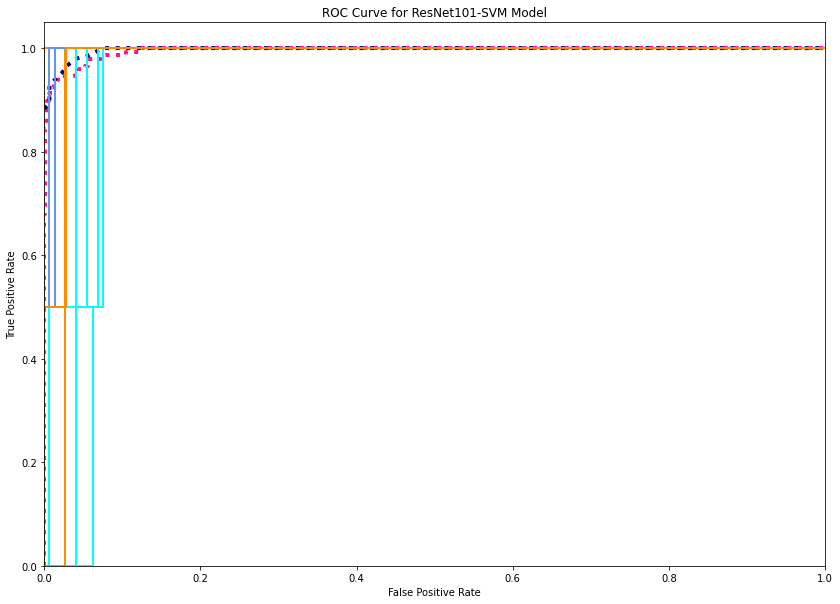

In [23]:
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(0, len(class_names))]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(0, len(class_names)):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= len(class_names)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (14,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
lw =2
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ResNet101-SVM Model')
# plt.legend(loc="lower right")
plt.show()

In [26]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_TF_train, y_TF_train)

x_validation_list=[]
y_validation_list=[]

val_class_names = os.listdir("../../feature/feature_fbank_validation/")
val_class_names.sort()
val_fname=[]

for i in range(0,len(val_class_names)):
    val_files=os.listdir("../../feature/feature_fbank_validation/"+val_class_names[i])
    val_files = [file for file in val_files if file.endswith(".npy")]
    for j in range(0, len(val_files)):
        val_fname.append("../../feature/feature_fbank_validation/"+val_class_names[i]+"/"+val_files[j])

X_TF_pred = []
y_TF_pred = []

for i,fname in zip(range(0,len(val_fname)), val_fname):
    print(i,fname)
    
    fbank = image.load_img(val_npy_2_png(fname.split('/')[4],fname.split('/')[5]), target_size=(224,224))
    tempX = image.img_to_array(fbank)
    tempX = np.expand_dims(tempX, axis=0)
    tempX = preprocess_input(tempX)
    
    flatten = model.predict(tempX)
    
    X_TF_pred.append(list(flatten[0]))
    y_TF_pred.append(val_class_names.index(fname.split('/')[4]))

    
X_TF_pred = np.array(X_TF_pred)
y_TF_pred = np.array(y_TF_pred)
y_TF_pred_encode = tf.keras.utils.to_categorical(y_TF_pred)

predicted = clf.predict(X_TF_pred)
real =[]
for i,pred in zip(range(0, len(predicted)), predicted) :
    print("Predict :",class_names[pred], ", Real :", val_class_names[y_TF_pred[i]])
    real.append(class_names.index(val_class_names[y_TF_pred[i]]))
# 
# get the accuracy
print (accuracy_score(real, predicted))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


0 ../../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_4.npy
1 ../../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_1.npy
2 ../../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


3 ../../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_2.npy
4 ../../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_3.npy
5 ../../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


6 ../../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_4.npy
7 ../../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_3.npy
8 ../../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


9 ../../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_2.npy
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019880007_hwanghyebin , Real : 2017019740001_kwakjuheon
Predict : 2017019770031_kwonnahui , Real : 2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019770008_parksomi , Real : 2017019880001_kimsubin
Predict : 2017019770008_parksomi , Real : 2017019880001_kimsubin
Predict : 2017019770008_parksomi , Real : 2017019880001_kimsubin
Predict : 2017019880027_leesol , Real : 2017019880001_kimsubin
Predict : 2017019770008_parksomi , Real : 2017019880001_kimsubin
0.3


### Global Average Pooling

### Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_TF_train, y_TF_train)

GradientBoostingClassifier(random_state=0)

In [28]:
predicted_gb = gbrt.predict(X_TF_test)
print(X_TF_test.shape)

# get the accuracy
print (accuracy_score(y_TF_test, predicted_gb))

(81, 2048)
0.38271604938271603
